<a href="https://colab.research.google.com/github/gollum-98/Machine_Poet/blob/master/Sylvia_Plath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import csv

In [64]:
with open("/content/kaggle_poem_dataset.csv") as f:
  reader = csv.reader(f)
  next(reader)
  data=[]
  authors = ["sylvia plath"]#,"oscar wilde","william wordsworth","john keats"]
  for row in reader:
    for author in authors:
      name = row[1].lower()
      if name == author:
        poem = row[4].split("\n")
        data.append(poem)
#print(data)

In [66]:
corpus= []
for poem in data:
    for line in poem:
        corpus.append(line)

In [67]:
print(corpus)

['First, are you our sort of a person?', 'Do you wear', 'A glass eye, false teeth or a crutch,', 'A brace or a hook,', 'Rubber breasts or a rubber crotch,', '', "Stitches to show something's missing? No, no? Then", 'How can we give you a thing?', 'Stop crying.', 'Open your hand.', 'Empty? Empty. Here is a hand', '', 'To fill it and willing', 'To bring teacups and roll away headaches', 'And do whatever you tell it.', 'Will you marry it?', 'It is guaranteed', '', 'To thumb shut your eyes at the end', 'And dissolve of sorrow.', 'We make new stock from the salt.', 'I notice you are stark naked.', 'How about this suit——', '', 'Black and stiff, but not a bad fit.', 'Will you marry it?', 'It is waterproof, shatterproof, proof', 'Against fire and bombs through the roof.', "Believe me, they'll bury you in it.", '', 'Now your head, excuse me, is empty.', 'I have the ticket for that.', 'Come here, sweetie, out of the closet.', 'Well, what do you think of that?', 'Naked as paper to start', '', "Bu

In [68]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
print(len(word_index))

1361


In [69]:
print(word_index)

{'the': 1, 'a': 2, 'and': 3, 'i': 4, 'of': 5, 'in': 6, 'to': 7, 'it': 8, 'my': 9, 'you': 10, 'your': 11, 'is': 12, 'me': 13, 'like': 14, 'have': 15, 'they': 16, 'are': 17, 'as': 18, 'with': 19, 'do': 20, 'or': 21, 'am': 22, 'on': 23, 'that': 24, 'its': 25, 'not': 26, 'for': 27, 'their': 28, 'at': 29, 'by': 30, 'an': 31, 'one': 32, 'so': 33, 'from': 34, 'this': 35, 'now': 36, 'out': 37, 'white': 38, 'love': 39, 'how': 40, 'black': 41, 'her': 42, 'no': 43, 'will': 44, 'red': 45, 'be': 46, 'nothing': 47, 'all': 48, 'was': 49, 'but': 50, 'these': 51, 'them': 52, 'face': 53, 'off': 54, 'eye': 55, 'through': 56, 'what': 57, 'there': 58, 'dead': 59, 'o': 60, 'tulips': 61, 'head': 62, 'think': 63, 'gold': 64, 'blue': 65, 'hands': 66, 'sea': 67, 'daddy': 68, 'could': 69, 'jew': 70, 'pure': 71, 'back': 72, 'she': 73, 'up': 74, 'day': 75, 'water': 76, 'first': 77, 'our': 78, 'can': 79, 'we': 80, 'hand': 81, 'empty': 82, 'marry': 83, 'come': 84, 'well': 85, 'paper': 86, 'talk': 87, 'blood': 88, 'c

In [70]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range (1,len(token_list)):
    n_gram = token_list[:i+1]
    input_sequences.append(n_gram)
print(input_sequences)

[[77, 17], [77, 17, 10], [77, 17, 10, 78], [77, 17, 10, 78, 164], [77, 17, 10, 78, 164, 5], [77, 17, 10, 78, 164, 5, 2], [77, 17, 10, 78, 164, 5, 2, 240], [20, 10], [20, 10, 403], [2, 404], [2, 404, 55], [2, 404, 55, 405], [2, 404, 55, 405, 241], [2, 404, 55, 405, 241, 21], [2, 404, 55, 405, 241, 21, 2], [2, 404, 55, 405, 241, 21, 2, 406], [2, 407], [2, 407, 21], [2, 407, 21, 2], [2, 407, 21, 2, 165], [242, 408], [242, 408, 21], [242, 408, 21, 2], [242, 408, 21, 2, 242], [242, 408, 21, 2, 242, 409], [410, 7], [410, 7, 411], [410, 7, 411, 412], [410, 7, 411, 412, 413], [410, 7, 411, 412, 413, 43], [410, 7, 411, 412, 413, 43, 43], [410, 7, 411, 412, 413, 43, 43, 114], [40, 79], [40, 79, 80], [40, 79, 80, 414], [40, 79, 80, 414, 10], [40, 79, 80, 414, 10, 2], [40, 79, 80, 414, 10, 2, 115], [415, 416], [243, 11], [243, 11, 81], [82, 82], [82, 82, 116], [82, 82, 116, 12], [82, 82, 116, 12, 2], [82, 82, 116, 12, 2, 81], [7, 417], [7, 417, 8], [7, 417, 8, 3], [7, 417, 8, 3, 418], [7, 117], [7

In [71]:
##pad sequences
max_length = max([len(x) for x in input_sequences])
x = pad_sequences(input_sequences,maxlen=max_length)
seq = np.array(x)

In [72]:
xs, labels = seq[:,:-1],seq[:,-1]

In [73]:
print(xs.shape)

(3183, 62)


In [74]:
print(labels)

[ 17  10  78 ... 225  53  23]


In [75]:
total_words = len(word_index) + 1
from tensorflow.keras.utils import to_categorical
ys = to_categorical(labels,total_words)

In [76]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt
embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((total_words, 100));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

--2020-07-14 13:32:29--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 172.217.212.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347116733 (331M) [text/plain]
Saving to: ‘/tmp/glove.6B.100d.txt’

/tmp/glove.6B.100d. 100%[===================>] 331.04M  88.1MB/s    in 4.1s    

2020-07-14 13:32:33 (81.5 MB/s) - ‘/tmp/glove.6B.100d.txt’ saved [347116733/347116733]



In [79]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(total_words,100,input_length=max_length-1,weights=[embeddings_matrix], trainable=False),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256,return_sequences=True)),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256)),
                                    #tf.keras.layers.Dense(total_words*2,activation="relu"),
                                    tf.keras.layers.Dense(total_words,activation="softmax")
])
model.summary()
model.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 62, 100)           136200    
_________________________________________________________________
bidirectional (Bidirectional (None, 62, 512)           731136    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 512)               1574912   
_________________________________________________________________
dense (Dense)                (None, 1362)              698706    
Total params: 3,140,954
Trainable params: 3,004,754
Non-trainable params: 136,200
_________________________________________________________________


In [80]:
history = model.fit(xs,ys,epochs=100)

Epoch 1/100
100/100 [==============================] - 8s 79ms/step - loss: 6.6626 - accuracy: 0.0449
Epoch 2/100
100/100 [==============================] - 8s 78ms/step - loss: 6.1051 - accuracy: 0.0609
Epoch 3/100
100/100 [==============================] - 8s 78ms/step - loss: 5.9235 - accuracy: 0.0688
Epoch 4/100
100/100 [==============================] - 8s 77ms/step - loss: 5.6485 - accuracy: 0.0851
Epoch 5/100
100/100 [==============================] - 8s 78ms/step - loss: 5.2821 - accuracy: 0.0936
Epoch 6/100
100/100 [==============================] - 8s 78ms/step - loss: 4.9189 - accuracy: 0.1144
Epoch 7/100
100/100 [==============================] - 8s 78ms/step - loss: 4.5536 - accuracy: 0.1291
Epoch 8/100
100/100 [==============================] - 8s 78ms/step - loss: 4.1441 - accuracy: 0.1499
Epoch 9/100
100/100 [==============================] - 8s 78ms/step - loss: 3.7419 - accuracy: 0.1970
Epoch 10/100
100/100 [==============================] - 8s 78ms/step - loss: 3.328

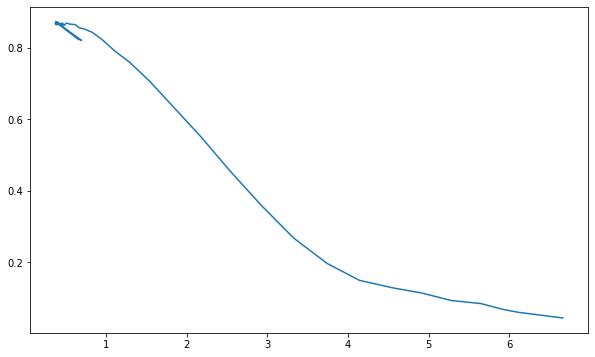

In [83]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
acc = history.history["accuracy"]
plt.figure(figsize=(10,6))
plt.plot(loss,acc)

In [90]:
seed_text = 'a paperweight'
next_words = 50
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_length-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

a paperweight in your chin instead of your foot your skin and your smiling luck skin and a hill of wires and bushes as health torch welding and the cutting or purifying of metals metals metal and the cutting of the fourth later died of radiation burns or sickness or other winged
